## Stock analysis with pandas-datareader

### packages used
* pandas-datareader = get stock data
* mplfinance        = matplotlib finance plots
* datetime          = get datetime

In [3]:
import pandas_datareader.data as web

import mplfinance as mpf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from prophet import Prophet

import datetime 
import math

C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
#define time line

start = datetime.datetime(2019, 1, 1)
startX = datetime.datetime(2021, 6, 1)
end = datetime.datetime(2021, 12, 26)
endX = datetime.datetime(2021, 12, 26)

#define source
source = "yahoo"

#define stocks
stocks = ["TMO", "GOOGL", "TSLA", "JNJ"]

In [5]:
all = web.DataReader(stocks, source, start, end)
TMO = web.DataReader("TMO", source, start, end)
GOOGL = web.DataReader("GOOGL", source, start, end)
TSLA = web.DataReader("TSLA", source, start, end)
JNJ = web.DataReader("JNJ", source, start, end)
AAPL = web.DataReader("AAPL", source, start, end)
MSCI = web.DataReader("MSCI", source, start, end) # na


Text(0.5, 1.0, 'Opening stock prices')

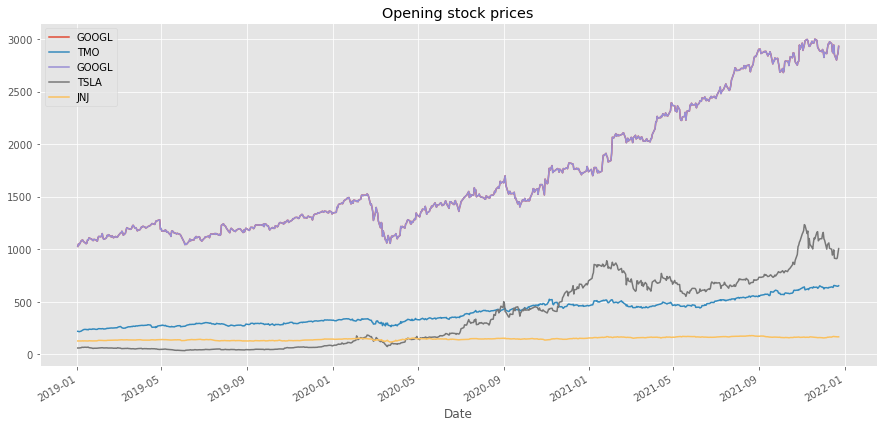

In [90]:
#multiple plots

all["Open"]["GOOGL"].plot()


for stock in stocks:
    all["Open"][stock].plot(label=stock, figsize=(15,7))
plt.legend()
plt.title("Opening stock prices")

# ACHTUNG NICHT IM VERHÄLTNISS  

## Single Stock with moving averages

* MA50 = Moving average of 50 days

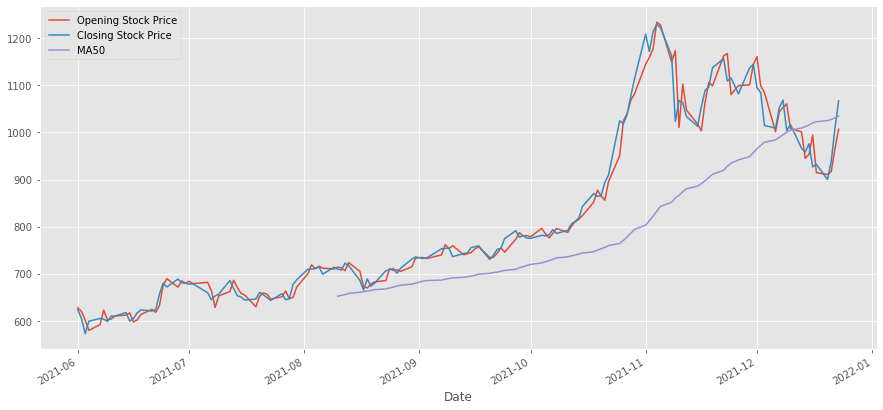

In [8]:
TSLA = web.DataReader("TSLA", source, startX, endX)

TSLA["MA50"] = TSLA["Open"].rolling(50).mean()

TSLA["Open"].plot(label="Opening Stock Price", figsize=(15,7))
TSLA["Close"].plot(label="Closing Stock Price", figsize=(15,7))
TSLA["MA50"].plot(label="MA50", figsize=(15,7))

plt.legend()

### Function for visualizing moving averages

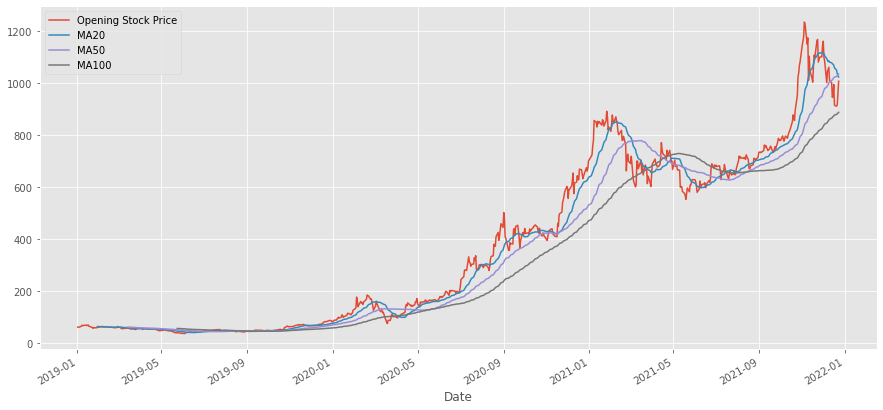

In [88]:
def stocker(stockX, *maxx):

    if not isinstance(maxx, list):
        maxx = [maxx]

    maxx = list(*maxx)


    stockX["Open"].plot(label="Opening Stock Price", figsize=(15,7))
    
    for i in maxx:
        stockX["MA" + str(i)] = stockX["Open"].rolling(i).mean()
        stockX["MA" + str(i)].plot(label="MA" + str(i), figsize=(15,7))

    plt.legend()

stocker(TSLA, 20, 50, 100)

In [147]:
TMO["Open"].index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23'],
              dtype='datetime64[ns]', name='Date', length=752, freq=None)

## Candlestick plot with the mpfinance package

* Moving average gives insight into markt movement
* only use 20, 50 and 200

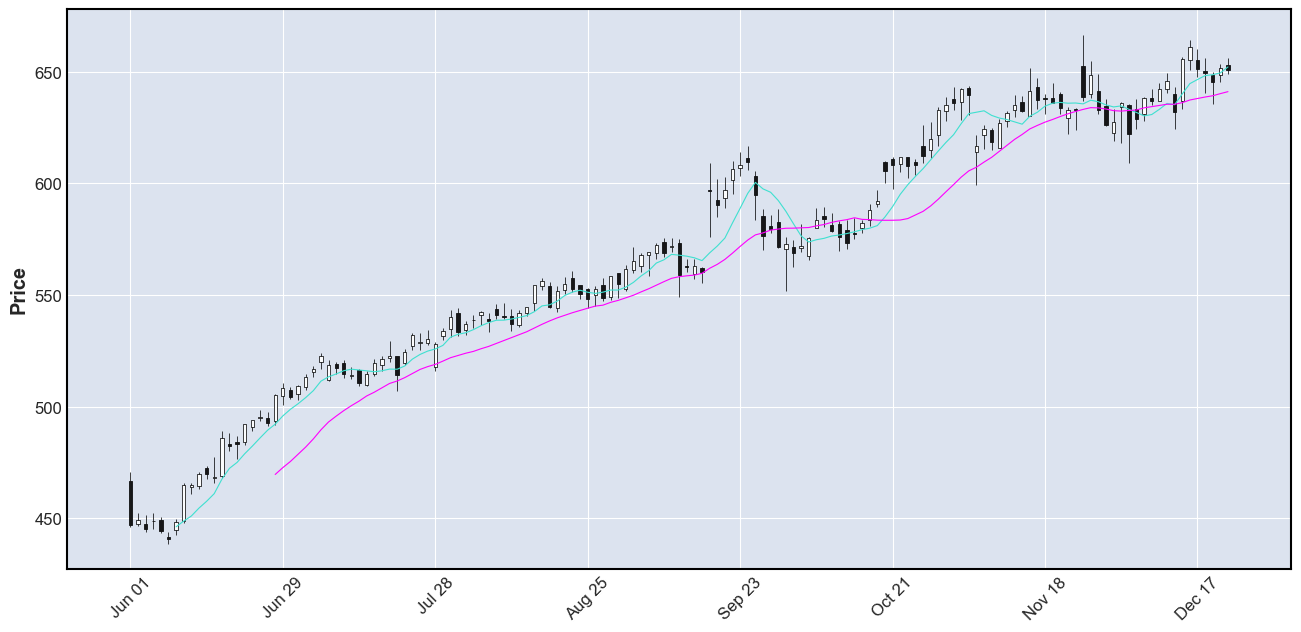

In [121]:
TMO = web.DataReader("TMO", source, startX, endX)
mpf.plot(TMO,type='candle',mav=(7, 20), figsize=(17,8)) #set moving averages range with mav=

C:\Users\kevin\anaconda3\envs\python38_r411\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


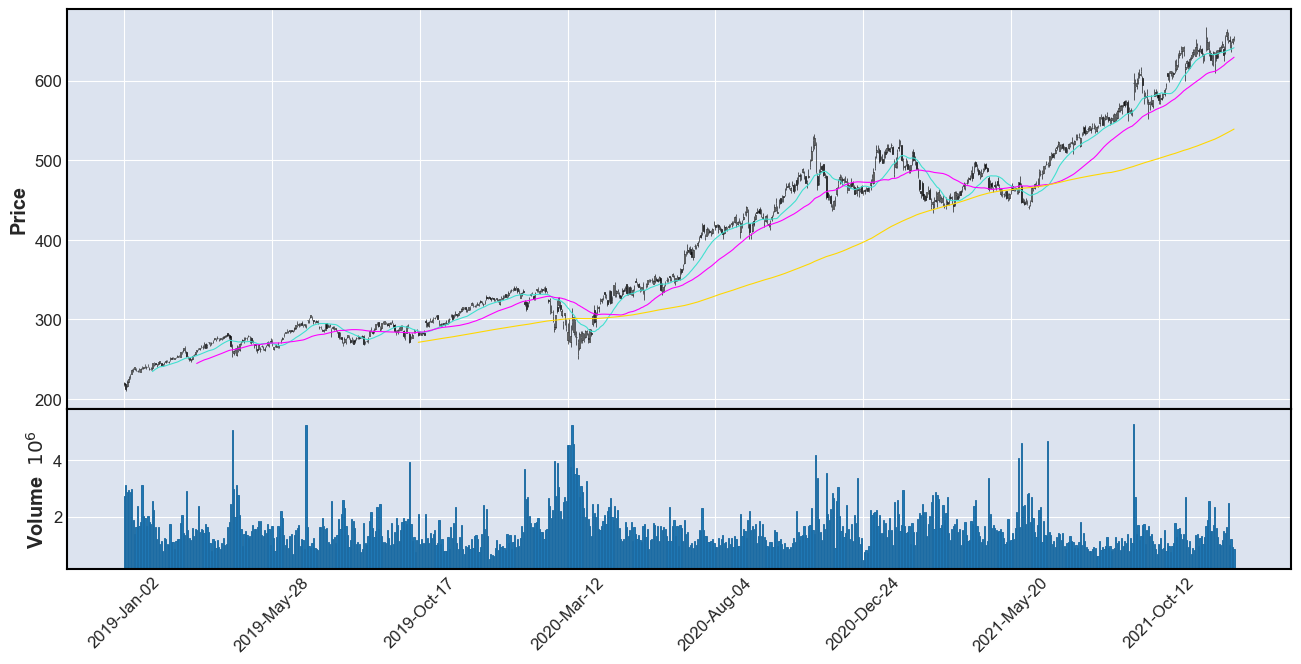

In [155]:
TMO = web.DataReader("TMO", source, start, end)
mpf.plot(TMO,type='candle',mav=(20, 50, 200), figsize=(17,8), volume=True) #set moving averages range with mav=


## Volatility distribution by the daily percentage change

## $ r_{r} = \frac{Price_{t}}{Price_{t-1}} -1 $

## with price(t) = stock price at day t and price(t-1) stock price the day before


In [100]:
TSLA["returns"] = TSLA["Open"] / TSLA["Open"].shift(1) -1
JNJ["returns"] = JNJ["Open"] / JNJ["Open"].shift(1) -1
AAPL["returns"] = AAPL["Open"] / AAPL["Open"].shift(1) -1

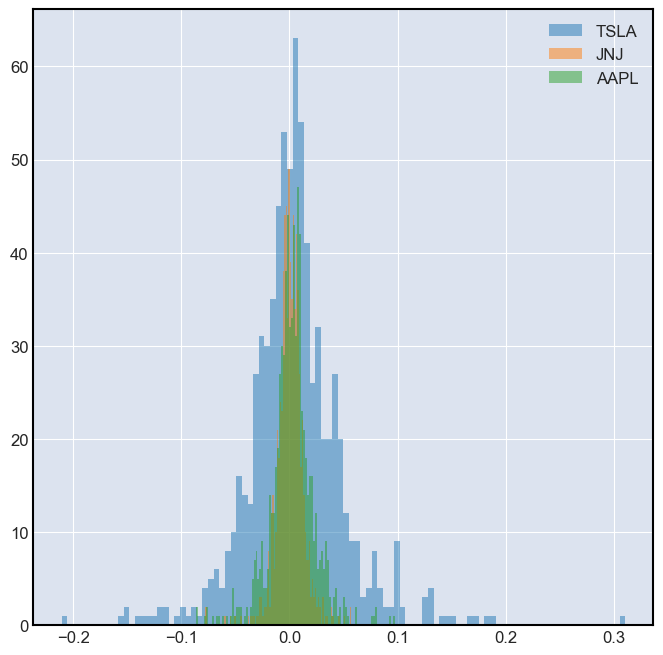

In [112]:
def priceFluk(stockX, bini = 50):

    for stock, lab in zip(stockX, ["TSLA", "JNJ", "AAPL"]):
        stock["returns"].hist(bins=100, label=str(lab), alpha = 0.5, figsize=(8,8))
    plt.legend()
    plt.show()

priceFluk([TSLA, JNJ, AAPL])